# 第二章 基础二维图
## 2.10 二维物理场色彩图



In [2]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
# 新增
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

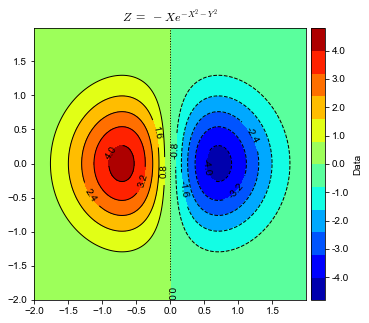

In [54]:
# 1. 准备数据
delta = 0.01
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = -X*np.exp(-X**2 - Y**2)*10
# 2. 创建画布
fig = plt.figure(figsize=(5,5))
ax=plt.gca()
# 3. 绘制等值线
CSf = ax.contourf(X,Y,Z, levels=10, cmap='jet', extend='neither')
CSf.cmap.set_over('k')
CSf.cmap.set_under('w')
# CSf = ax.pcolor(X,Y,Z,cmap='jet',edgecolors='face')
CS = ax.contour(X, Y, Z, levels=10,colors='k',linewidths=1)
# 4. 设置线型
for line, lvl in zip(CS.collections, CS.levels):
    if lvl < 0:
        line.set_linestyle('--')
    elif lvl == 0:
        line.set_linestyle(':')
    else:
        line.set_linestyle('-')
# cb=plt.colorbar(CSf)
caxis = inset_axes(ax,width='100%',height='100%', loc='lower left', 
                   bbox_to_anchor=(1.02, 0, 0.05, 1), 
                   bbox_transform=ax.transAxes,borderpad=0)
cb = plt.colorbar(CSf, cax=caxis, format='%.1f', orientation='vertical')
cb.set_label('Data')
cb.set_ticks(range(-5, 5, 1))
# 设置等值文字标注
ax.clabel(CS, inline=True, fmt='%.1f', fontsize=10)
# title
ax.set_title('$Z\ = \ -Xe^{-X^2-Y^2}$')
# xy方向一比一
ax.axis('scaled')
# savefig
# plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_10_basic.pdf')
plt.show()

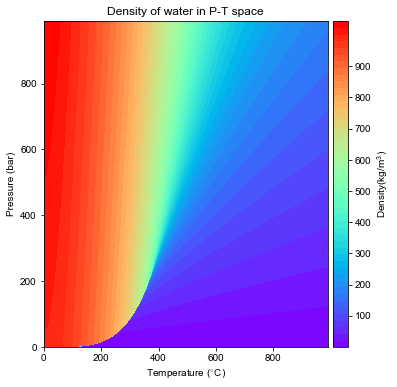

In [66]:
plt.figure(figsize=(5.8,5))
ax=plt.gca()
cmap='rainbow'
prop='RHO'
nlevel=50
TT=np.loadtxt('data/contour/TT.dat')
PP=np.loadtxt('data/contour/PP.dat')
Prop=np.loadtxt('data/contour/'+prop+'.dat')
levels=np.linspace(np.min(Prop),np.max(Prop),nlevel)
# 
CSf=ax.contourf(TT,PP/1e5,Prop,cmap=cmap,levels=levels)
# CS=ax.contour(TT,PP/1e5,Prop,cmap=cmap,levels=levels)
ax.set_xlim(0,990)
ax.set_ylim(0,990)
ax.set_xlabel('Temperature ($^{\circ}$C)')
ax.set_ylabel('Pressure (bar)')
ax.set_title('Density of water in P-T space')
# 设置等值文字标注
ax.clabel(CS, inline=True, fmt='%.0f', fontsize=10)
caxis = inset_axes(ax,width='100%',height='100%', loc='lower left', 
                   bbox_to_anchor=(1.02, 0, 0.05, 1), 
                   bbox_transform=ax.transAxes,borderpad=0)
cb = plt.colorbar(CSf, cax=caxis, format='%.0f', orientation='vertical')
cb.set_label('Density(kg/m$^{\mathregular{3}}$)')
cb.set_ticks(range(0, 1000, 100))
whspace=0.06
plt.subplots_adjust(wspace=whspace, hspace=whspace, bottom=0.085, left=0.12, right=0.80, top=0.99)
# savefig
plt.savefig('../../figures/Chapter2/Lecture2_10_example1.pdf')
plt.show()

(361,) (181,) (181, 361) (181, 361)


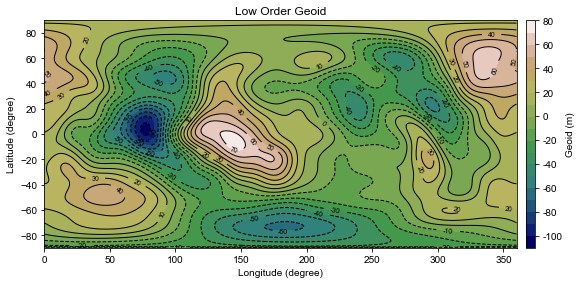

In [76]:
# 1. 读取nc
data=Dataset('data/contour/osu91a1f_16.nc')
# print(data.variables) #查看变量
lon=data.variables['lon'][:]
lat=data.variables['lat'][:]
z=data.variables['z'][:]
# 构建网格
X, Y = np.meshgrid(lon, lat)
print(lon.shape,lat.shape,z.shape,X.shape)
# 绘制等值线
fig=plt.figure(figsize=(8,4))
ax=plt.gca()
CSf=ax.contourf(X,Y,z, cmap='gist_earth', levels=20)
CS=ax.contour(X,Y,z,colors='k',linewidths=1,levels=20)
# CS=ax.contour(X,Y,z,linewidths=1,levels=16,cmap='rainbow')
caxis = inset_axes(ax,width='100%',height='100%', loc='lower left', 
                   bbox_to_anchor=(1.02, 0, 0.02, 1), 
                   bbox_transform=ax.transAxes,borderpad=0)
cb = plt.colorbar(CSf, cax=caxis, format='%.0f', orientation='vertical')
cb.set_label('Geoid (m)')
# cb.set_ticks(range(0, 1000, 100))
# 设置等值文字标注
ax.clabel(CS, inline=True, fmt='%.0f', fontsize=7)
ax.set_xlabel('Longitude (degree)')
ax.set_ylabel('Latitude (degree)')
ax.set_title('Low Order Geoid')
# savefig
whspace=0.06
plt.subplots_adjust(wspace=whspace, hspace=whspace, bottom=0.13, left=0.08, right=0.9, top=0.92)
plt.savefig('../../figures/Chapter2/Lecture2_10_example2.pdf')
plt.show()